## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# load data into pandas
df = pd.read_csv('data/kc_house_data.csv')

In [1]:
import geopandas

In [4]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [2]:
df.head() #taking a quick look at the first few rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# adding the corresponding city names per the zipcodes
payload=pd.read_html("https://www.zipcodestogo.com/Washington/")
df_zipcode = payload[1]
df_zipcode = df_zipcode.drop([0,1], axis=0)
df_zipcode = df_zipcode.drop([3], axis=1)
df_zipcode.columns = ['zipcode', 'city', 'county']
df_zipcode.index -= 2

zipcode_dic = {}
for i in range(len(df_zipcode)):
    zipcode_dic[int(df_zipcode.zipcode[i])] = df_zipcode.city[i]

df['city'] = df['zipcode'].map(zipcode_dic)

In [4]:
df.head() #checking to see the city names column

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish


In [5]:
df.city.unique() #seeing how many cities are included in this dataset

array(['Seattle', 'Kenmore', 'Sammamish', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Mercer Island',
       'Kent', 'Issaquah', 'Renton', 'Vashon', 'Kirkland',
       'Black Diamond', 'North Bend', 'Woodinville', 'Snoqualmie',
       'Enumclaw', 'Fall City', 'Bothell', 'Carnation', 'Medina'],
      dtype=object)

In [6]:
# dropping some columns that we don't think we need
df.drop(['id', 'view','sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [7]:
df.head() #confirming that the columns have been dropped

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,city
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0,98178,Seattle
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,Seattle
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN,98028,Kenmore
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,Seattle
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,Sammamish


In [8]:
df.waterfront.describe() #exploring the waterfront column

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [9]:
df['year_sold'] = pd.DatetimeIndex(df['date']).year #adding a year_soldd column from the info in 'date' column

In [10]:
df.yr_renovated.isnull().sum() #checking for null values in yr_renovated

3842

In [11]:
df.yr_renovated.value_counts() 

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
df.dropna(axis = 0, inplace = True) #dropping the rows that have any null values

(array([  3.,   6.,  13.,  16.,  27.,  38., 109.,  94., 154., 192.]),
 array([1934. , 1942.1, 1950.2, 1958.3, 1966.4, 1974.5, 1982.6, 1990.7,
        1998.8, 2006.9, 2015. ]),
 <BarContainer object of 10 artists>)

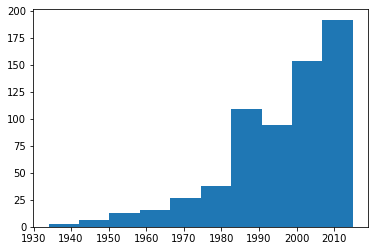

In [13]:
renovated = df[df['yr_renovated']>0].yr_renovated
plt.hist(renovated) #histogram showing the distribution of renovated houses 1930-2010

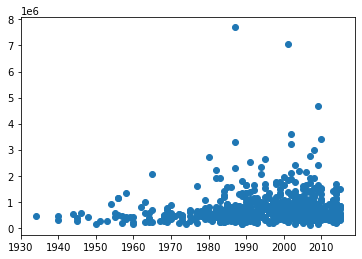

In [14]:
x = df[df['yr_renovated']>0].yr_renovated
y = df[df['yr_renovated']>0].price
plt.scatter(x,y) #scatterplot showing the prices of houses that were renovated

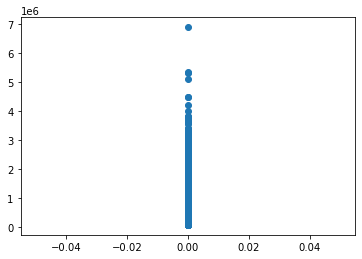

In [15]:
x2 = df[df['yr_renovated']==0].yr_renovated
y2 = df[df['yr_renovated']==0].price
plt.scatter(x2,y2) #sowing the house prices of houses that were not renovated

In [16]:
import numpy as np
conditions = [df['yr_renovated']==0, df['yr_renovated']>0]
choices = [0,1]
df['renovated'] = np.select(conditions,choices)

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,city,year_sold,renovated
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,Seattle,2014,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,Seattle,2014,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,Sammamish,2015,0
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,0.0,98053,Redmond,2014,0
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,0.0,98003,Federal Way,2014,0


<AxesSubplot:xlabel='renovated', ylabel='price'>

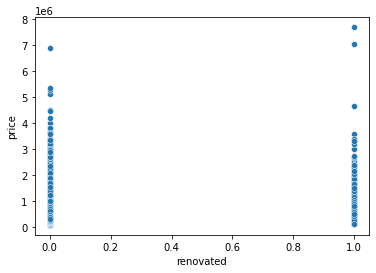

In [18]:
import seaborn as sns
sns.scatterplot(x = 'renovated', y = 'price', data = df)

In [19]:
df['sqft_liv_lot'] = df['sqft_living'] + df['sqft_lot']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,city,year_sold,renovated,sqft_liv_lot
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,Seattle,2014,1,9812
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,Seattle,2014,0,6960
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,Sammamish,2015,0,9760
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,0.0,98053,Redmond,2014,0,107350
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,0.0,98003,Federal Way,2014,0,8534


In [20]:
groupdf = df.groupby(['condition', 'sqft_liv_lot'])['price'].mean()
groupdf = pd.DataFrame(groupdf)

In [21]:
groupdf.reset_index(inplace=True)

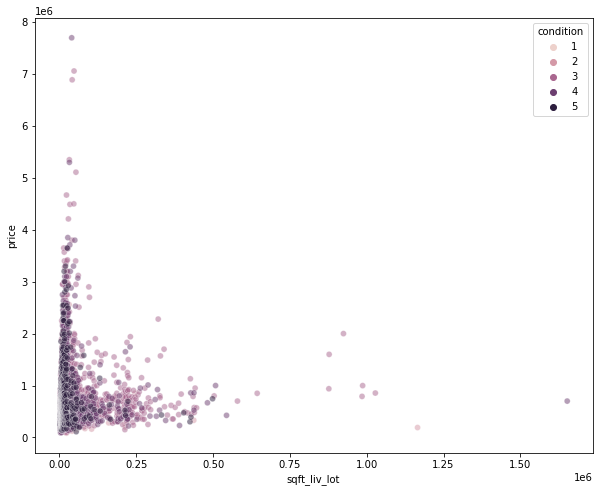

In [22]:
import seaborn as sns
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x = 'sqft_liv_lot', y = 'price', data = groupdf, hue = 'condition', alpha = 0.5)

In [23]:
(df.sqft_liv_lot>10000).value_counts()

False    8594
True     7215
Name: sqft_liv_lot, dtype: int64

In [24]:
df.groupby('condition')['price'].mean()

condition
1    384365.789474
2    336278.923664
3    543319.051600
4    522689.139725
5    613198.219745
Name: price, dtype: float64

In [25]:
(df.condition==5).value_counts()

False    14553
True      1256
Name: condition, dtype: int64

In [26]:
cndtn_dummies = pd.get_dummies(df['condition'], prefix = 'cndtn', drop_first = True)
grade_dummies = pd.get_dummies(df['grade'], prefix = 'grade', drop_first = True)
ss = StandardScaler()
sqft_liv_lot = np.array(df['sqft_liv_lot']).reshape(-1,1)
ss.fit(sqft_liv_lot)
df['sqft_liv_lot_scld'] = ss.transform(sqft_liv_lot)
df_to_use = pd.DataFrame([])
df_to_use = pd.concat([df,cndtn_dummies,grade_dummies], axis = 1)

In [27]:
df_to_use

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,0,0,0,1,0,0,0,0,0,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,0,0,0,0,1,0,0,0,0,0
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,...,0,0,0,0,0,0,0,1,0,0
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,...,0,0,0,0,1,0,0,0,0,0
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,...,0,0,0,0,1,0,0,0,0,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,...,0,0,0,0,1,0,0,0,0,0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,0


In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
# data = df
X = df_to_use.drop(['price','date','city','grade','condition','yr_renovated','sqft_liv_lot'], axis = 1)
y = df_to_use['price']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X.astype(float)[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X.astype(float)[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathrooms                      with p-value 0.0


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  yr_built                       with p-value 0.0


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_living                    with p-value 0.0


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  waterfront                     with p-value 1.3001e-280


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bedrooms                       with p-value 4.45661e-135


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_12                       with p-value 2.28584e-103


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_13                       with p-value 3.72945e-105


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_11                       with p-value 2.33891e-107


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_10                       with p-value 5.03075e-163


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_9                        with p-value 1.23945e-163


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_8                        with p-value 6.85867e-110


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_7                        with p-value 3.64985e-43


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  cndtn_5                        with p-value 4.01781e-13


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_lot                       with p-value 1.59751e-12


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_liv_lot_scld              with p-value 0.0


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  year_sold                      with p-value 2.30777e-12


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  floors                         with p-value 2.3831e-11


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  renovated                      with p-value 7.49653e-05


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  cndtn_4                        with p-value 1.27016e-05


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_6                        with p-value 0.00134019


<ipython-input-29-640a2a2fd083>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['bathrooms', 'yr_built', 'sqft_living', 'waterfront', 'bedrooms', 'grade_12', 'grade_13', 'grade_11', 'grade_10', 'grade_9', 'grade_8', 'grade_7', 'cndtn_5', 'sqft_lot', 'sqft_liv_lot_scld', 'year_sold', 'floors', 'renovated', 'cndtn_4', 'grade_6']


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

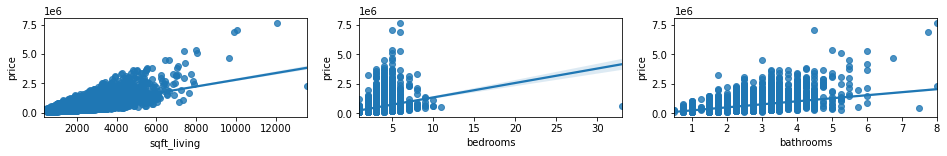

In [36]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)



sns.regplot(x=X['sqft_living'], y=y, ax=ax1)
sns.regplot(x=X['bedrooms'], y=y, ax=ax2)
sns.regplot(x=X['bathrooms'], y=y, ax=ax3)


In [37]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'